# Deal Hector B3 LA MANU - Amiens
## TP Siluriformes

### Nous allons utiliser le fichier représentant les ventes de poisson-chats en amérique du nord de 1986 à 2012 en milliers de livres (in 1000s of Pounds).

Importation des bibliothèques utilisées pour l'analyse de série temporelles et les prévisions
    -> pmdarima pour la modélisation de statistique,
    -> pandas & numpy pour la manipulation des données,
    -> ainsi que matplotlib pour la visualisation graphique

In [2]:
import pmdarima as pm
import pandas
import numpy
import matplotlib.pyplot as plt

from statsmodels.tsa.api import graphics
from statsmodels.tsa.stattools import adfuller

### Nous allons récupérer notre dataset, et afficher les premières et dernières lignes de celui-ci
1. Importer le dataset catfish

In [3]:
catfish_sales = pandas.read_csv('./data/catfish.csv', index_col=0, parse_dates=True)
catfish_sales.head()
catfish_sales.tail()

,Total
Date,
2012-08-01,14442
2012-09-01,13422
2012-10-01,13795
2012-11-01,13352
2012-12-01,12716


2. Tracer la courbe de vente de poisson-chats

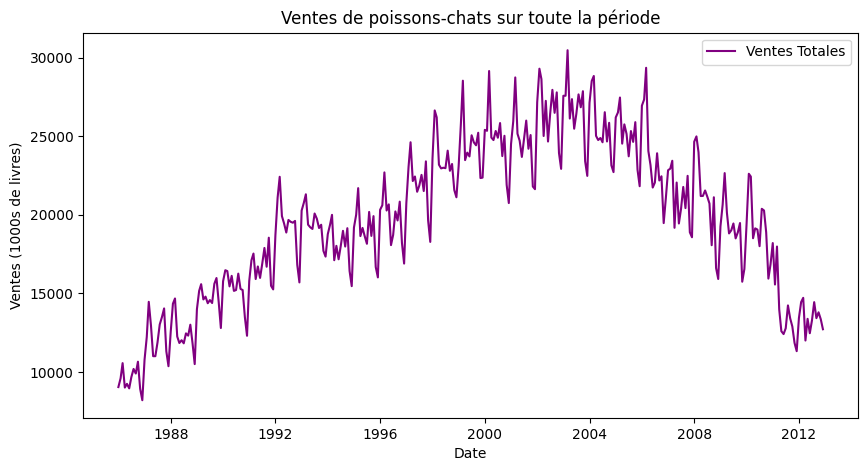

In [4]:
# Tracer de la courbe des ventes
plt.figure(figsize=(10, 5))
plt.plot(catfish_sales, label="Ventes Totales", color='purple')

plt.xlabel("Date")
plt.ylabel("Ventes (1000s de livres)")
plt.title("Ventes de poissons-chats sur toute la période")
plt.legend()
plt.show()


3. Tracer la courbe de vente de 1996 à 2000

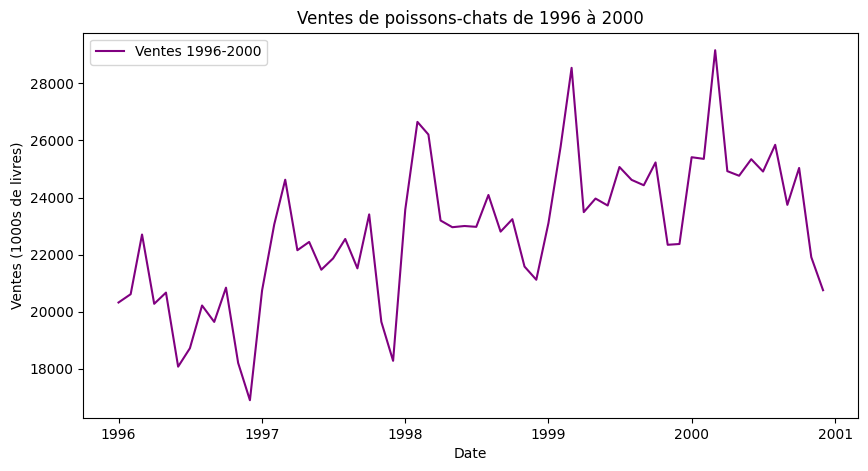

In [5]:

# Tracer de la courbe des ventes entre 1996 et 2000
catfish_96_00 = catfish_sales['1996':'2000']
plt.figure(figsize=(10, 5))
plt.plot(catfish_96_00, label="Ventes 1996-2000", color='purple')
plt.xlabel("Date")
plt.ylabel("Ventes (1000s de livres)")
plt.title("Ventes de poissons-chats de 1996 à 2000")
plt.legend()
plt.show()

4. Quelle est la moyenne des ventes 

    -> sur l’année 92 ?

    -> sur la décennie 90 (1990 à 1999) ?

    -> sur l’ensemble du dataset ?

In [6]:
# Calcul des moyennes
mean_92 = catfish_sales.loc['1992'].mean()
mean_90s = catfish_sales.loc['1990':'1999'].mean()
mean_total = catfish_sales.mean()


print(f"Moyenne des ventes en 1992: {mean_92.iloc[0]:.2f} (1000s de livres)")
print(f"Moyenne des ventes dans les années 90: {mean_90s.iloc[0]:.2f} (1000s de livres)")
print(f"Moyenne des ventes sur l'ensemble du dataset: {mean_total.iloc[0]:.2f} (1000s de livres)")

Moyenne des ventes en 1992: 19278.00 (1000s de livres)
Moyenne des ventes dans les années 90: 19701.81 (1000s de livres)
Moyenne des ventes sur l'ensemble du dataset: 19643.98 (1000s de livres)


5. Quelle est la médiane des ventes - sur l’année 92 ? - sur la décennie 90 (1990 à 1999) ? - sur l’ensemble du dataset ?

In [7]:

# Calcul des médianes
median_92 = catfish_sales.loc['1992'].median()
median_90s = catfish_sales.loc['1990':'1999'].median()
median_total = catfish_sales.median()


print(f"Médiane des ventes en 1992: {median_92.iloc[0]:.2f} (1000s de livres)")
print(f"Médiane des ventes dans les années 90: {median_90s.iloc[0]:.2f} (1000s de livres)")
print(f"Médiane des ventes sur l'ensemble du dataset: {median_total.iloc[0]:.2f} (1000s de livres)")

Médiane des ventes en 1992: 19529.50 (1000s de livres)
Médiane des ventes dans les années 90: 19477.00 (1000s de livres)
Médiane des ventes sur l'ensemble du dataset: 19660.50 (1000s de livres)


6. Quelle est le mode des ventes

    -> sur l’année 92 ?

    -> sur la décennie 90 (1990 à 1999) ?

    -> sur l’ensemble du dataset ?

In [8]:
#Calcul des modes
mode_92 = catfish_sales.loc['1992'].mode()
mode_90s = catfish_sales.loc['1990':'1999'].mode()
mode_all = catfish_sales.mode()


print(f"Mode des ventes en 1992 : {mode_92}")
print(f"Mode des ventes dans les années 90 : {mode_90s}")
print(f"Mode des ventes sur l’ensemble du dataset : {mode_all}")

Mode des ventes en 1992 :     Total
0   15698
1   16814
2   18698
3   18874
4   19454
5   19500
6   19559
7   19615
8   19676
9   19923
10  21100
11  22425
Mode des ventes dans les années 90 :      Total
0    12300
1    13488
2    15158
3    15212
4    15214
..     ...
115  25229
116  25780
117  26207
118  26650
119  28544

[120 rows x 1 columns]
Mode des ventes sur l’ensemble du dataset :    Total
0  15158
1  18204
2  19451


7. Quelle est l’écart-type des ventes

Un écart-type élevé indique une plus grande variation des ventes d’un mois à l’autre.
D’après nos résultats :
En 1992, les ventes étaient relativement stables, avec une variation modérée.
Sur la décennie 90, la fluctuation était plus marquée, signe de variations plus importantes.
Sur l’ensemble de la période analysée, les ventes ont connu des hausses et des baisses encore plus significatives, traduisant une forte volatilité à long terme.

In [9]:
# Calcul de l'écart-type pour chaque période
std_92 = catfish_sales.loc['1992'].std()
std_90s = catfish_sales.loc['1990':'1999'].std()
std_all = catfish_sales.std()

print(f"Écart-type des ventes en 1992 : {std_92}")
print(f"Écart-type des ventes dans les années 90 : {std_90s}")
print(f"Écart-type des ventes sur l'ensemble du dataset : {std_all}")


Écart-type des ventes en 1992 : Total    1744.024187
dtype: float64
Écart-type des ventes dans les années 90 : Total    3063.095165
dtype: float64
Écart-type des ventes sur l'ensemble du dataset : Total    5039.324331
dtype: float64


8. La série est-elle stationnaire ?

D'après ce qu'on peut voir sur le graphique au dessus, les ventes de poisson chat ne sont pas stationnaire car on observe une tendance claire -> une augmentation des ventes jusqu'aux années 2000, suivie d'une diminution progressive.

9. La série comporte elle une saisonnalité ?

On remarque des fluctuations régulières tout au long de la série, ce qui suggère une saisonnalité. Certaines périodes reviennent avec des ventes plus élevées ou plus faible.

10. La série présente elle une tendance ?

La série présente une tendance, d'abord avec une hausse progressive des ventes des années 1985 à 2000, puis une baisse après 2005. il y a donc une tendance non stationnaire avec une phase de croissance suivie d’un déclin.

11. Pouvez vous à partir des données de 1986 à 2000 établir un modèle prédictif sur les ventes de 2001 à 2012 ? Comparez le avec les ventes réelles et critiquez le.

Si on regarde les données de 1986 à 2000, on remarque une tendance avec une saisonnalité bien marquée. Du coup, le modèle prédit des ventes stables entre 20 000 et 25 000, en prenant cette saisonnalité en compte. En réalité cette prédiction n'est pas totalement juste car les données passées ne peuvent pas prévoir les changements à venir. Par exemple, la chute des ventes n'a pas été anticipée.

/home/hectord/www/python/exercice-maths/tp-siluriformes/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hectord/www/python/exercice-maths/tp-siluriformes/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hectord/www/python/exercice-maths/tp-siluriformes/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hectord/www/python/exercice-maths/tp-siluriformes/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hectord/ww

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  180
Model:               SARIMAX(4, 1, 4)   Log Likelihood               -1528.689
Date:                Fri, 14 Mar 2025   AIC                           3075.378
Time:                        23:17:38   BIC                           3104.064
Sample:                    01-01-1986   HQIC                          3087.010
                         - 12-01-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7375      0.028    -26.225      0.000      -0.793      -0.682
ar.L2         -0.2502      0.035     -7.134      0.000      -0.319      -0.181
ar.L3         -0.6996      0.032    -22.122      0.0

/home/hectord/www/python/exercice-maths/tp-siluriformes/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hectord/www/python/exercice-maths/tp-siluriformes/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hectord/www/python/exercice-maths/tp-siluriformes/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hectord/www/python/exercice-maths/tp-siluriformes/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


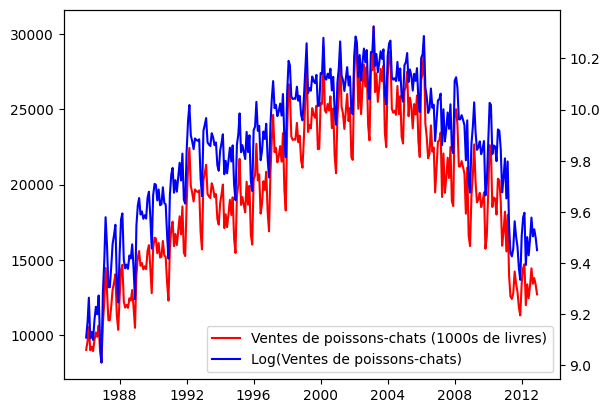

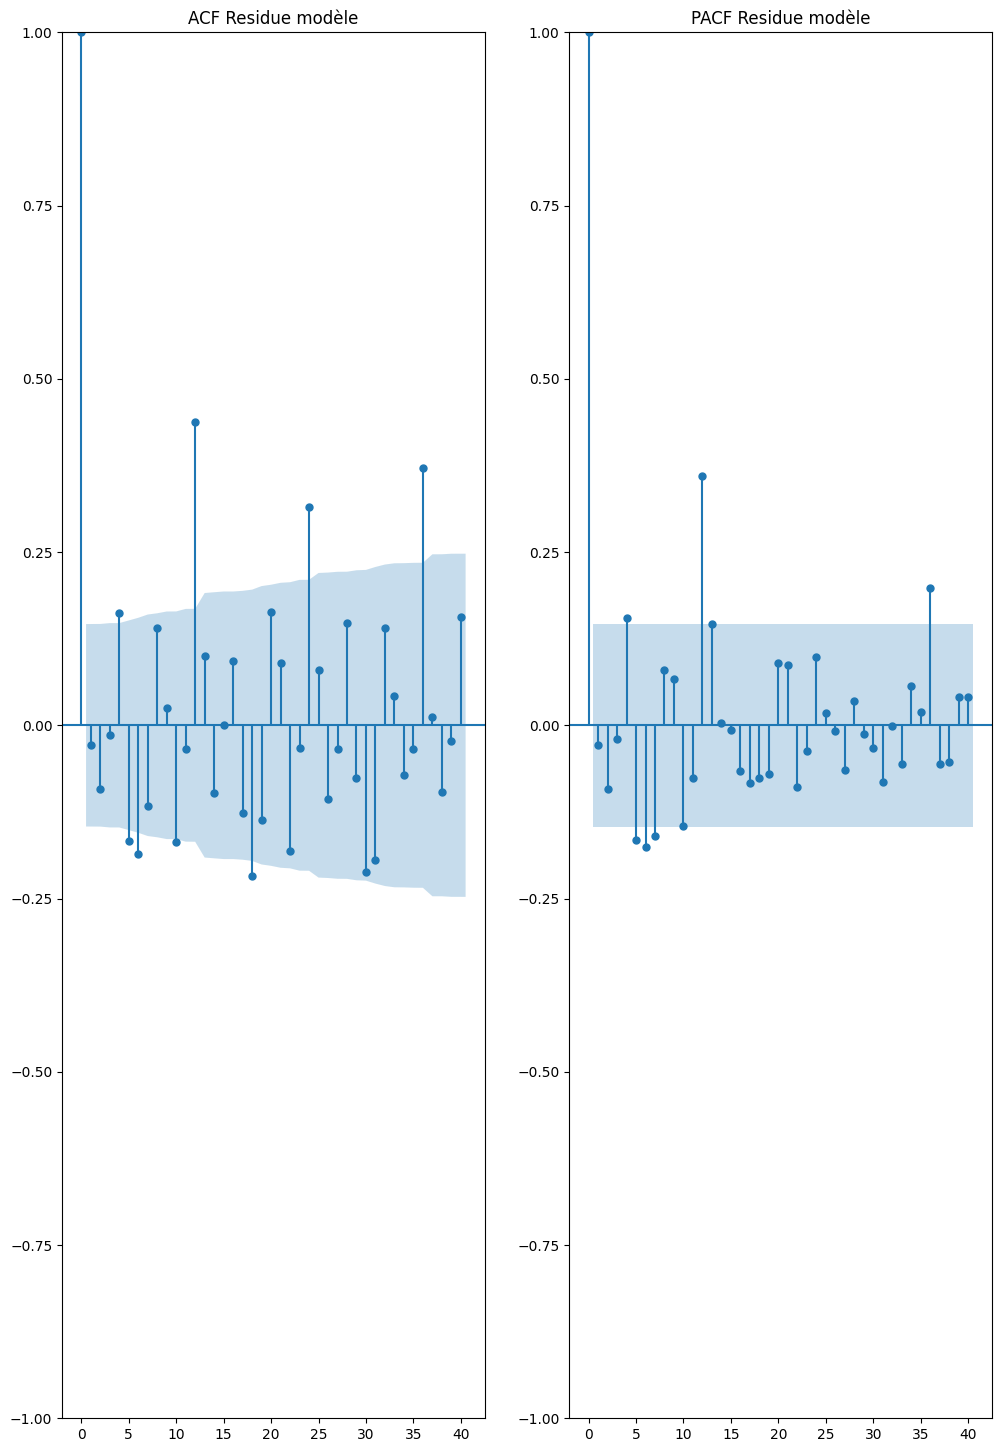

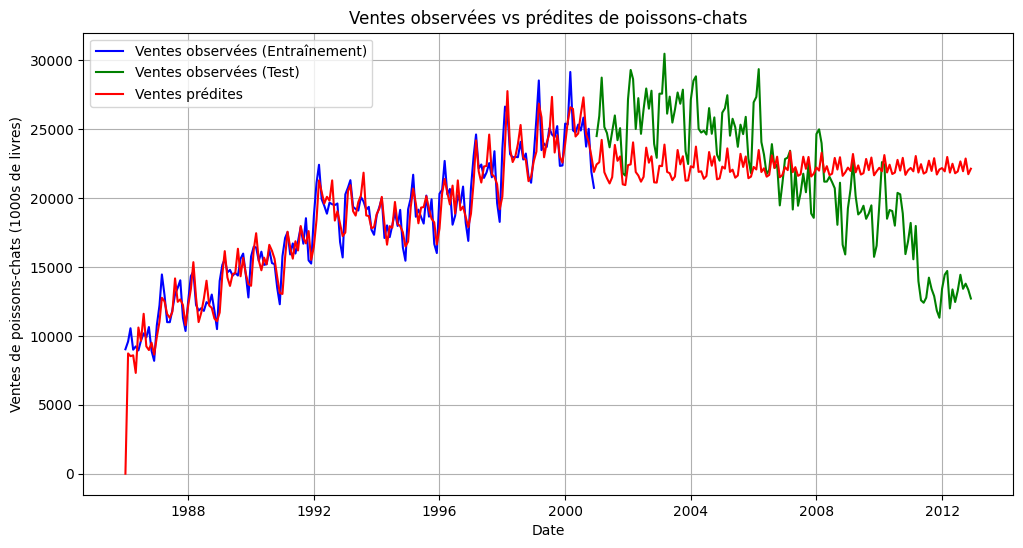

In [ ]:
def plot_acf_pacf(timeseries):
    fig = plt.figure(figsize=(12, 18))
    for index, (timeserie_title, timeserie) in enumerate(timeseries.items()):
        index = index * 2
        ax = fig.add_subplot(len(timeseries), 2, index + 1)
        ax.title.set_text(timeserie_title)
        graphics.plot_acf(timeserie, ax=ax, lags=40)
        ax.title.set_text('ACF %s' % timeserie_title)

        ax = fig.add_subplot(len(timeseries), 2, index + 2)
        graphics.plot_pacf(timeserie, ax=ax, lags=40)
        ax.title.set_text('PACF %s' % timeserie_title)
        

log_catfish_sales = numpy.log(catfish_sales)

# création d'un graphique avec la série originale
g, ax = plt.subplots()
ln1 = ax.plot(catfish_sales, c='r', label='Ventes de poissons-chats (1000s de livres)')

# création d'un graphique avec la série log en conservent le même axe des abscisses
ax2 = ax.twinx()
ln2 = ax2.plot(log_catfish_sales, c='b', label='Log(Ventes de poissons-chats)')

# ajout de la légende
lns = ln1 + ln2
labels=[l.get_label() for l in lns]
ax.legend(lns, labels)

# Séparer les données en ensemble d'entraînement et ensemble de test
# train_data = catfish_sales[:-15]
# test_data = catfish_sales[-15:]
train_data = catfish_sales['1986':'2000']
test_data = catfish_sales['2001':'2012']


# Utiliser auto_arima pour trouver le meilleur modèle ARIMA
model = pm.auto_arima(train_data)
# model = pm.auto_arima(train_data, seasonal=True, stepwise=True, suppress_warnings=True)
 

print(model.summary())

# Ajuster le modèle aux données
model.fit(train_data)
# Obtenir les résidus du modèle
residuals = model.resid()
plot_acf_pacf({
    'Residue modèle': residuals
})

# Faire des prédictions sur l'ensemble d'entraînement
train_pred, train_confint = model.predict_in_sample(return_conf_int=True)

# Faire des prédictions sur l'ensemble de test
n_periods = len(test_data)
predicted, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Concaténer les prédictions pour l'ensemble d'entraînement et de test
all_predictions = pandas.concat([pandas.Series(train_pred, index=train_data.index),
                            pandas.Series(predicted, index=test_data.index)],
                            axis=0)

# Tracer les valeurs réelles et les prédictions pour l'ensemble d'entraînement et de test
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Ventes observées (Entraînement)', color='blue')
plt.plot(test_data, label='Ventes observées (Test)', color='green')
plt.plot(all_predictions, label='Ventes prédites', color='red')

plt.xlabel('Date')
plt.ylabel('Ventes de poissons-chats (1000s de livres)')
plt.title('Ventes observées vs prédites de poissons-chats')
plt.legend()
plt.grid(True)
# plt.savefig("prediction.png")
plt.show()


12. Quel modèle nous propose la libraire pmdarima ?

La librairie propose le modèle SARIMAX(4,1,4), ce qui signifie que les ventes sont influencées par les 4 mois précédents.